# Image Upscaler

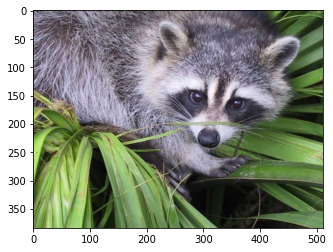

In [28]:
from imageio import imread
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import math

img = Image.open('racoon.jpg')
plt.imshow(img)
plt.show()
racoon = imread('racoon.jpg')
# plt.imshow(racoon); plt.show()

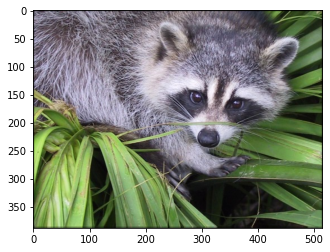

In [2]:
def padImage(image):
    h,w,v = image.shape
    paddedImage = np.zeros((h+4,w+4,v))
    padH, padW, padV = paddedImage.shape
    #top left corner
    paddedImage[0:1,0:1,:] = image[0,0,:]
    #top right corner
    paddedImage[0:1,padW-2:,:] = image[0,w-1,:]
    #bottom left corner
    paddedImage[padH-2:padH-1,0:1,:] = image[h-1,0,:]
    #bottom right corner
    paddedImage[padH-2:padH-1,padW-2:,:] = image[h-1,w-1,:]
    #top row
    paddedImage[0,2:padW-2,:] = image[0,:,:]
    #bottom row
    paddedImage[padH-1,2:padW-2,:] = image[h-1,:,:]
    #left column
    paddedImage[2:padH-2,0,:] = image[:,0,:]
    #right column
    paddedImage[2:padH-2,padW-1,:] = image[:,w-1,:]
    #the rest
    paddedImage[2:padH-2,2:padW-2,:] = image[:,:,:]
    return paddedImage
    
image = np.asarray(img.convert('RGB'))
h,w,v = image.shape
(h,w,v)
paddedImage = padImage(image)

# toShow = Image.fromarray(paddedImage, 'RGB')
plt.imshow(paddedImage.astype(np.uint8))
plt.show()



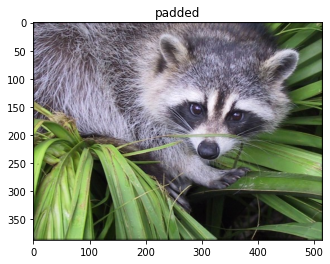

In [3]:
def plotImage(image, title=""):
    im = np.array(image, dtype=np.uint8)
    plt.imshow(im, vmin = 0, vmax = 255)
    plt.title(title)
    plt.show()
plotImage(paddedImage, "padded")

In [4]:
def upscaleImage(paddedImage):
    h,w,v = paddedImage.shape
    toReturn = np.zeros(((h-4)*2,(w-4)*2,v))
    print("paddedImageShape", (h,w,v))
    print("toReturnShape", toReturn.shape)
    for i in range(0,(h-4)*2):
        hIndex = math.floor(i/2.0)+2
        for j in range(0,(w-4)*2):
#             print(i,j)
            wIndex= math.floor(j/2.0)+2
            if (i%2 == 0 and j%2 == 0):
                toReturn[i,j,:] = (paddedImage[hIndex-1,wIndex-1,:] + paddedImage[hIndex-1,wIndex,:] + paddedImage[hIndex,wIndex-1,:] + paddedImage[hIndex,wIndex])/4
            elif i%2==1 and j%2 == 1:
                toReturn[i,j,:] = (paddedImage[hIndex+1,wIndex+1,:] + paddedImage[hIndex+1,wIndex,:] + paddedImage[hIndex,wIndex+1,:] + paddedImage[hIndex,wIndex])/4
            elif i%2==1:
                toReturn[i,j,:] = (paddedImage[hIndex+1,wIndex-1,:] + paddedImage[hIndex+1,wIndex,:] + paddedImage[hIndex,wIndex-1,:] + paddedImage[hIndex,wIndex])/4
            elif j%2==1:
                toReturn[i,j,:] = (paddedImage[hIndex-1,wIndex+1,:] + paddedImage[hIndex-1,wIndex,:] + paddedImage[hIndex,wIndex+1,:] + paddedImage[hIndex,wIndex,:])/4
    return toReturn

paddedImageShape (388, 516, 3)
toReturnShape (768, 1024, 3)


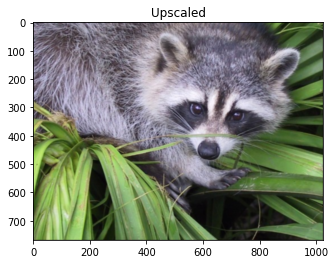

In [5]:
upscaledImage = upscaleImage(paddedImage)
plotImage(upscaledImage, "Upscaled")

Text(0.5, 1.0, 'Anti-aliased = false')

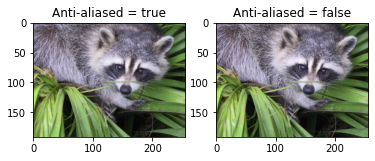

In [19]:
def padEdge(img,amount):
    padded = np.pad(img,((amount,amount),(amount,amount),(0,0)),mode='reflect')
    return padded

def downscaleByHalf(img, antiAliasing=False):
    return rescale(image, (0.5, 0.5, 1), anti_aliasing=antiAliasing)

#np.pad(img, ((0,0), (0, width), (0, 0)), mode='reflect'
edgePad = padEdge(image,5)
#plt.imshow(edgePad)
h,w,v = edgePad.shape
antiAliased = downscaleByHalf(image,True)
notAntiAliased = downscaleByHalf(image, False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(antiAliased)
ax[0].set_title("Anti-aliased = true")

ax[1].imshow(notAntiAliased)
ax[1].set_title("Anti-aliased = false")



In [91]:
staringImage = antiAliased
smallImage = np.array
def getKernels(image, kernelWidth):
    kernels = []
    kernelWidth = abs(kernelWidth)
    offset = math.floor(kernelWidth/2)
    if (offset%2)
    #for row in range(offset-1, image.shape[0]-offset):
        #for column in range(offset-1, image.shape[1]-offset):
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            toAdd = []
            #for i in range(-offset,offset):
            #    for j in range(-offset,offset):
            #        for k in range(3):
            #            toAdd.append(image[i,j,k])
            for i in range(0,offset):
                for j in range(0,offset):
                    for k in range(3):
                        toAdd.append(image[i,j,k])
            kernels.append(toAdd)
            #kernels.append(image[row:row+kernelWidth,column:column+kernelWidth,0])
            #kernels.append(image[row:row+kernelWidth,column:column+kernelWidth,])
            #kernels.append(image[row:row+kernelWidth,column:column+kernelWidth,2])
#            kernels.append(image[row-offset:row+offset, column-offset:column+offset,:])
            #print(kernels[len(kernels)-1])
    return kernels

In [92]:
#downscale image
#Pad image
#get kernel for each pixel
#match up said kernel with original image corresponding pixel
#put each kernel/pixel pair into a matrix
#set up matrix in the proper way for least squares regression
#run the calculations
#profit

In [93]:
a = np.array([[[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.],
        [10., 11., 12.],
        [13., 14., 15.]],

       [[16, 17., 18],
        [19., 20, 21],
        [22, 23, 24],
        [25, 26, 27],
        [28, 29, 30]],

       [[31, 32, 33],
        [34, 35, 36],
        [0., 0., 37],
        [40, 39, 38],
        [41, 42, 43]],

       [[44, 45, 46],
        [47, 48, 49],
        [50, 51, 52],
        [53, 54, 55],
        [56, 57, 58]],

       [[59, 60, 61],
        [62, 63, 64],
        [65, 66, 67],
        [68, 69, 70],
        [70, 71, 72]]])

kernels = getKernels(a,10)
print(kernels)

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 16.0, 17.0, 18.0